In [9]:
import pandas as pd

df = pd.read_csv('acquisitions.csv')
df = df.drop(columns='datetime')
df.head(5)

,AccelerationX,VelocityY,Temperature,AccelerationY,AccelerationZ,VelocityX,VelocityZ,alert
0,0.062500,2.263846,58.910188,0.187500,0.125000,0.754615,1.131923,0
1,0.125000,1.509231,58.674236,0.187500,0.125000,1.131923,1.131923,0
2,0.093750,1.122666,58.706409,0.234375,0.171875,0.523911,0.748444,0
3,0.093750,1.422043,58.738586,0.203125,0.140625,0.449066,0.598755,0
4,0.109375,1.422043,58.556259,0.187500,0.140625,0.598755,0.748444,0


# Visualising

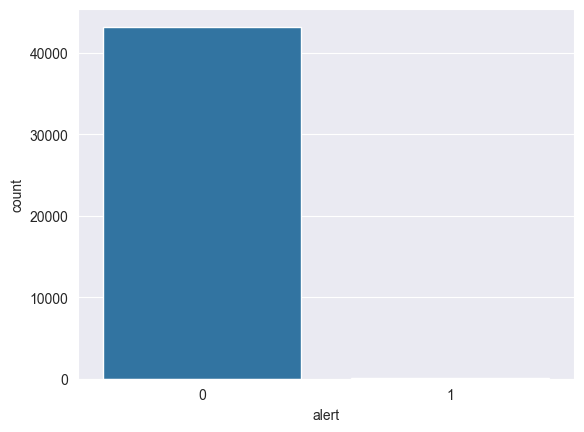

In [10]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='alert', data=df)

In [ ]:
'''Uma das técnicas de oversampling muito utilizada é a SMOTE. Sua ideia consiste em criar observações intermediárias entre os dados que estão próximos. Por exemplo, se minutos totais por dia são 129.1 e 146.3, então será criada uma amostra com os minutos totais por dia com 137.7. Lembrando que não é necessariamente a média entre as amostras.'''

In [11]:
# Para podermos aplicar o SMOTE, devemos separar os dados em variáveis características e resposta

X = df.drop('alert', axis = 1)
y = df['alert']

In [12]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [13]:
df = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
df.head(2)

,AccelerationX,VelocityY,Temperature,AccelerationY,AccelerationZ,VelocityX,VelocityZ,alert
0,0.0625,2.263846,58.910188,0.1875,0.125,0.754615,1.131923,0
1,0.1250,1.509231,58.674236,0.1875,0.125,1.131923,1.131923,0


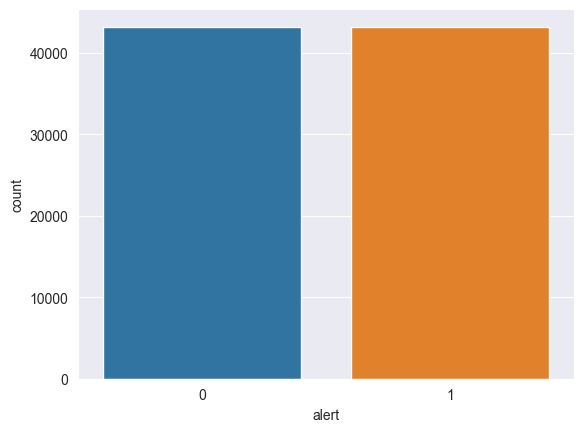

In [15]:
ax1 = sns.countplot(x='alert', data=df)

In [16]:
df.to_csv('acquisitions_modified.csv')